##Предварительная подготовка данных в Python

In [ ]:
# !pip3 install pandas-profiling==3.2

In [ ]:
# !pip3 install markupsafe==2.0.1

In [38]:
# подключим библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
 def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

    #желательно размещать после импорта библиотек

In [40]:

df = pd.read_csv('/content/Датасет+к+5+обязательному+заданию.csv')

In [41]:
df.head(3)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,24,121.54,2.4,12,65,5,0,0,5,56
1,51,287.51,1.7,111,109,1,44,0,6,1
2,41,113.70,2.1,41,27,0,0,0,1,36


In [42]:
df.isna().sum()      #проверяю на пропущенные значения

Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
dtype: int64

In [43]:
df.dtypes  #тип данных

Возраст                                    int64
Среднемесячный расход                    float64
Средняя продолжительность разговоров     float64
Звонков днем за месяц                      int64
Звонков вечером за месяц                   int64
Звонков ночью за месяц                     int64
Звонки в другие города                     int64
Звонки в другие страны                     int64
Доля звонков на стационарные телефоны      int64
Количество SMS за месяц                    int64
dtype: object

In [44]:
df.shape   #смотрим кол-во строк и столбцов

(4492, 10)

In [45]:
(len(df)-df.count()).sum()   #проверяю на пропущенные значения

0

In [46]:
df.duplicated().sum()   #проверяю на наличие дублирующихся данных

0

In [47]:
df.info()  #сверяю кол-во значений, пропуски и дуюликаты отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4492 non-null   float64
 2   Средняя продолжительность разговоров   4492 non-null   float64
 3   Звонков днем за месяц                  4492 non-null   int64  
 4   Звонков вечером за месяц               4492 non-null   int64  
 5   Звонков ночью за месяц                 4492 non-null   int64  
 6   Звонки в другие города                 4492 non-null   int64  
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   int64  
 9   Количество SMS за месяц                4492 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 351.1 KB


In [48]:
df.columns = df.columns.str.lower()

In [49]:
df.describe().round(2)

,возраст,среднемесячный расход,средняя продолжительность разговоров,звонков днем за месяц,звонков вечером за месяц,звонков ночью за месяц,звонки в другие города,звонки в другие страны,доля звонков на стационарные телефоны,количество sms за месяц
count,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00
mean,41.89,506.16,4.23,63.86,70.35,6.27,8.66,0.39,10.33,21.24
std,13.08,646.25,3.00,62.77,41.22,14.71,13.48,1.17,9.22,27.91
min,19.00,3.18,0.10,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,152.88,2.08,37.00,42.00,0.00,0.00,0.00,3.00,3.00
50%,43.00,316.96,3.30,53.00,71.00,1.00,2.00,0.00,8.00,6.00
75%,52.00,600.03,5.90,68.00,98.00,5.00,12.00,0.00,16.00,32.00
max,70.00,5142.76,20.00,500.00,160.00,110.00,88.00,12.00,60.00,179.00


In [50]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]    #выставляю доп. перцентели для поиска аномалий
df.describe(percentiles=per).round(2)

,возраст,среднемесячный расход,средняя продолжительность разговоров,звонков днем за месяц,звонков вечером за месяц,звонков ночью за месяц,звонки в другие города,звонки в другие страны,доля звонков на стационарные телефоны,количество sms за месяц
count,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00
mean,41.89,506.16,4.23,63.86,70.35,6.27,8.66,0.39,10.33,21.24
std,13.08,646.25,3.00,62.77,41.22,14.71,13.48,1.17,9.22,27.91
min,19.00,3.18,0.10,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1%,19.00,7.80,0.40,2.00,2.00,0.00,0.00,0.00,0.00,0.00
5%,20.00,16.92,1.10,5.00,4.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,152.88,2.08,37.00,42.00,0.00,0.00,0.00,3.00,3.00
50%,43.00,316.96,3.30,53.00,71.00,1.00,2.00,0.00,8.00,6.00
75%,52.00,600.03,5.90,68.00,98.00,5.00,12.00,0.00,16.00,32.00
95%,63.00,1608.16,9.70,133.00,142.00,35.00,38.45,2.00,27.00,78.45


In [51]:
#меняю формат у доли звонков на float64
df = df.astype({'доля звонков на стационарные телефоны': 'float64'},
               errors = 'ignore')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   возраст                                4492 non-null   int64  
 1   среднемесячный расход                  4492 non-null   float64
 2   средняя продолжительность разговоров   4492 non-null   float64
 3   звонков днем за месяц                  4492 non-null   int64  
 4   звонков вечером за месяц               4492 non-null   int64  
 5   звонков ночью за месяц                 4492 non-null   int64  
 6   звонки в другие города                 4492 non-null   int64  
 7   звонки в другие страны                 4492 non-null   int64  
 8   доля звонков на стационарные телефоны  4492 non-null   float64
 9   количество sms за месяц                4492 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 351.1 KB


In [53]:
!pip install transliterate

In [54]:
from transliterate import translit

In [55]:
from os import replace
df.columns = ['_'.join(translit(col, reversed=True,).split()[:4]) for col in df.columns]   #транслитерация заголовков

In [56]:
df.head(2)

,vozrast,srednemesjachnyj_rashod,srednjaja_prodolzhitel'nost'_razgovorov,zvonkov_dnem_za_mesjats,zvonkov_vecherom_za_mesjats,zvonkov_noch'ju_za_mesjats,zvonki_v_drugie_goroda,zvonki_v_drugie_strany,dolja_zvonkov_na_statsionarnye,kolichestvo_sms_za_mesjats
0,24,121.54,2.4,12,65,5,0,0,5.0,56
1,51,287.51,1.7,111,109,1,44,0,6.0,1


In [57]:
df.columns    #получаем название столбцов

Index(['vozrast', 'srednemesjachnyj_rashod',
       'srednjaja_prodolzhitel'nost'_razgovorov', 'zvonkov_dnem_za_mesjats',
       'zvonkov_vecherom_za_mesjats', 'zvonkov_noch'ju_za_mesjats',
       'zvonki_v_drugie_goroda', 'zvonki_v_drugie_strany',
       'dolja_zvonkov_na_statsionarnye', 'kolichestvo_sms_za_mesjats'],
      dtype='object')

In [58]:
# приводим заголовки в более читаемый вид
df_new = df.rename(columns = {"srednemesjachnyj_rashod" : 'sr_mes_rashod',
                            "srednjaja_prodolzhitel'nost'_razgovorov" : 'sr_prodolzh',
                            'zvonkov_vecherom_za_mesjats': 'zvonkov_vecherom',
                            'zvonkov_dnem_za_mesjats': 'zvonkov_dnem',
                            "zvonkov_noch'ju_za_mesjats": 'zvonkov_noch',
                            'zvonki_v_drugie_goroda': 'mezhgorod',
                            'zvonki_v_drugie_strany': 'mezhdunarodnye',
                            'dolja_zvonkov_na_statsionarnye': 'dolja_statsionar',
                            'kolichestvo_sms_za_mesjats': 'kol_sms'
                      })

In [59]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df_new.describe(percentiles=per).round(2)

,vozrast,sr_mes_rashod,sr_prodolzh,zvonkov_dnem,zvonkov_vecherom,zvonkov_noch,mezhgorod,mezhdunarodnye,dolja_statsionar,kol_sms
count,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00,4492.00
mean,41.89,506.16,4.23,63.86,70.35,6.27,8.66,0.39,10.33,21.24
std,13.08,646.25,3.00,62.77,41.22,14.71,13.48,1.17,9.22,27.91
min,19.00,3.18,0.10,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1%,19.00,7.80,0.40,2.00,2.00,0.00,0.00,0.00,0.00,0.00
5%,20.00,16.92,1.10,5.00,4.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,152.88,2.08,37.00,42.00,0.00,0.00,0.00,3.00,3.00
50%,43.00,316.96,3.30,53.00,71.00,1.00,2.00,0.00,8.00,6.00
75%,52.00,600.03,5.90,68.00,98.00,5.00,12.00,0.00,16.00,32.00
95%,63.00,1608.16,9.70,133.00,142.00,35.00,38.45,2.00,27.00,78.45


In [60]:
#рассчитаем границы усов для признака возраст
actual_loval, actual_hival = calc_boxplot(df_new['vozrast'])
actual_loval, actual_hival

(19, 70)

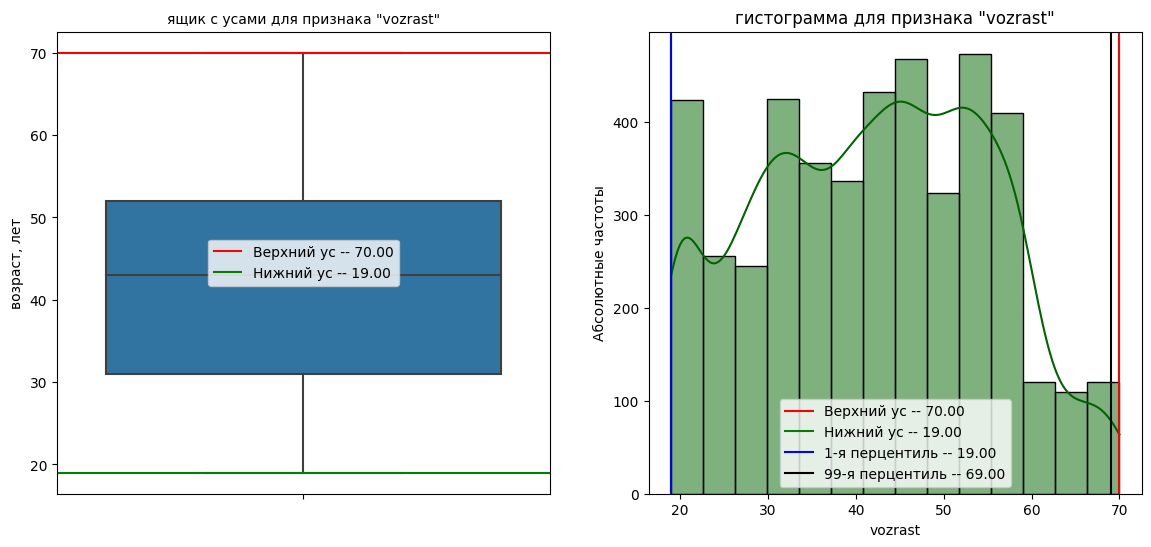

In [61]:
#поиск аномальных значений на примере одного признака

plt.subplots(nrows = 1,
             ncols = 2,
            #  sharey = True,
             figsize = (14,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_new,
            y = 'vozrast',
            # color = 'blue'
            )
actual_loval, actual_hival = calc_boxplot(df['vozrast'])  # используем функцию calc_boxplot, которую написали вначале практики для расчета усов

plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')

plt.title('ящик с усами для признака "vozrast"', fontsize=10)
plt.ylabel('возраст, лет', fontsize=10)
plt.legend()


plt.subplot(1,2,2)
sns.histplot(data=df_new,
            x = 'vozrast',
            color = 'darkgreen',
            bins = 14,
            kde = True)
plt.title('гистограмма для признака "vozrast"')
plt.ylabel('возраст, лет', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['vozrast'], 1)
per_99 = np.nanpercentile(df['vozrast'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [62]:
from numpy.ma.core import log10
1 + 3.322*log10(df_new.shape[0])  #показывает переход от непрерывного признака к дискретному

13.133404841492055

In [63]:
df_new.columns

Index(['vozrast', 'sr_mes_rashod', 'sr_prodolzh', 'zvonkov_dnem',
       'zvonkov_vecherom', 'zvonkov_noch', 'mezhgorod', 'mezhdunarodnye',
       'dolja_statsionar', 'kol_sms'],
      dtype='object')

In [64]:
# русифицируем заголовки для подписей на графиках

dict_to_rus = {'vozrast': 'возраст',
               'sr_mes_rashod': 'ср.мес.расход',
               'sr_prodolzh': 'cр.прод.разг',
               'zvonkov_dnem': 'звонков днем',
               'zvonkov_vecherom': 'звонков вечером',
               'zvonkov_noch': 'звонков ночью',
               'mezhgorod': 'межгород',
               'mezhdunarodnye': 'международные',
               'dolja_statsionar': 'доля_стац.телефоны',
               'kol_sms': 'sms за месяц'}

In [76]:
 def calc_boxplot(df_col : pd.Series) -> tuple:

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

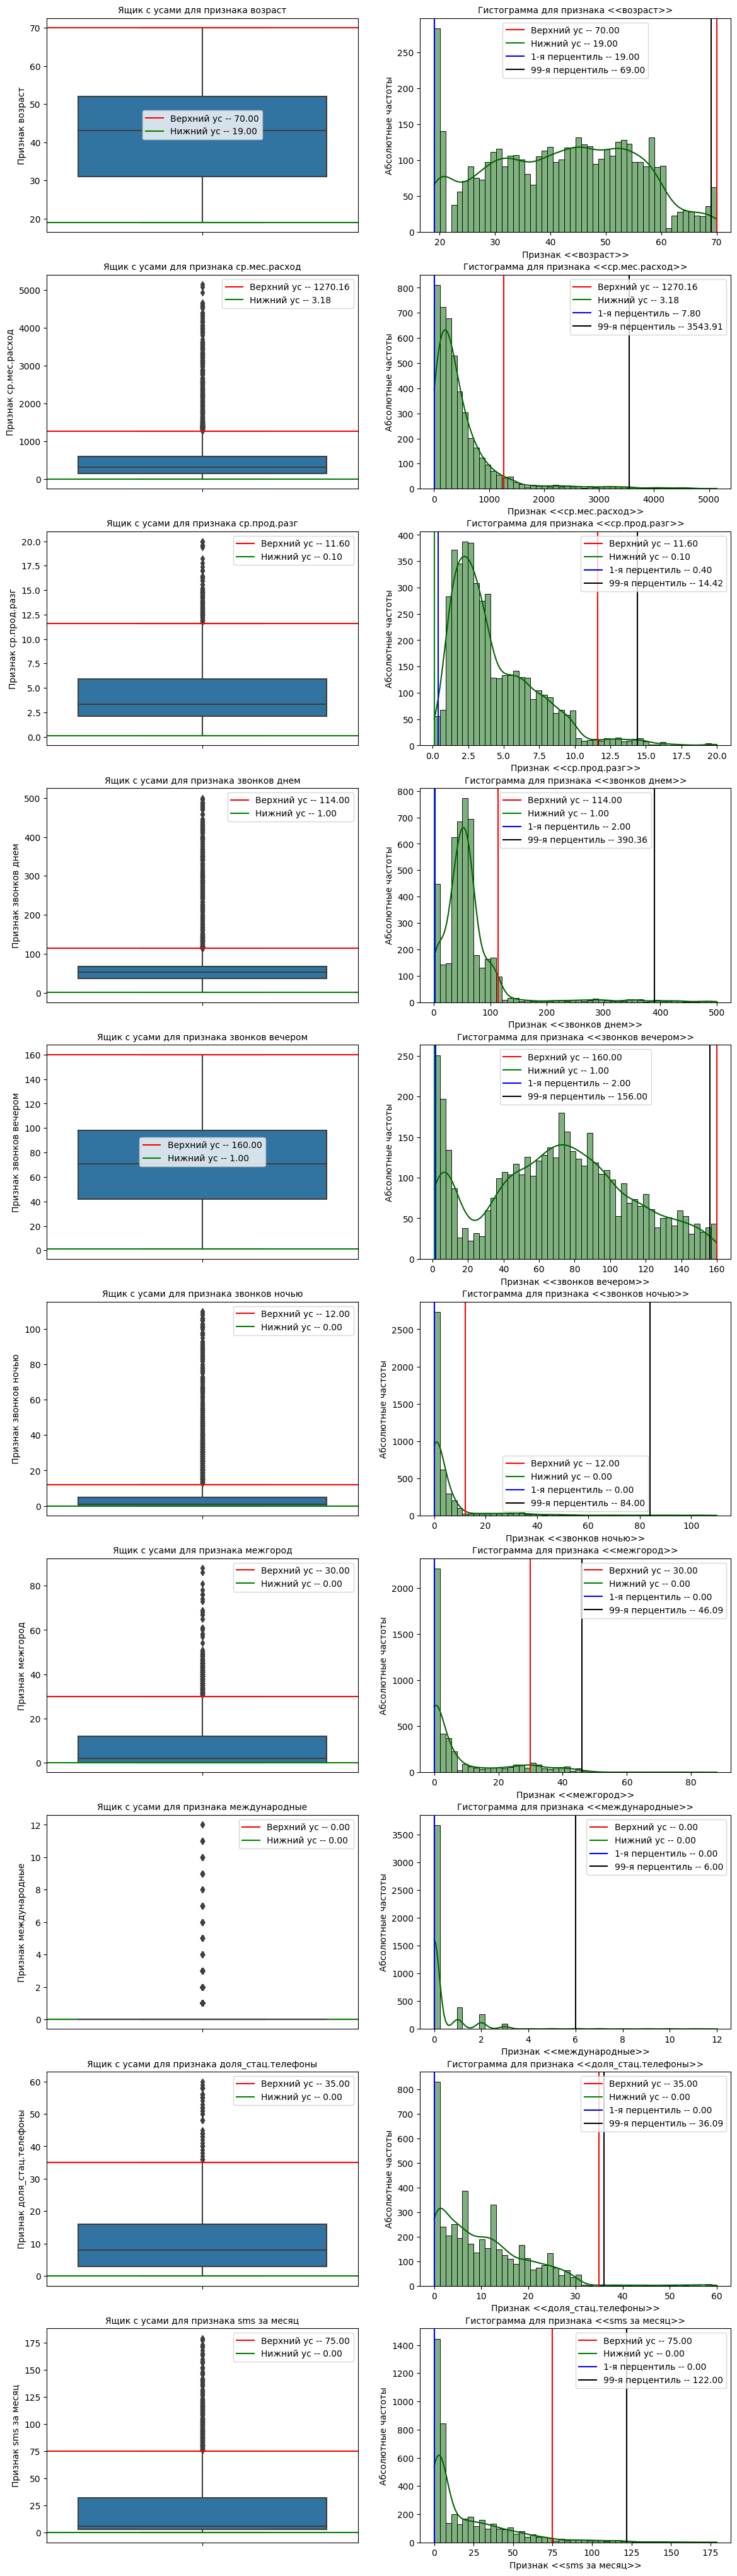

In [77]:
plt.subplots(nrows=10,
             ncols=2,
             #sharey=True,
             figsize=(14,52))
for index, col in enumerate(df_new, start=0):
    plt.subplot(10,2,2*index+1)
    sns.boxplot(data=df_new,
            y=col,
            )
    actual_loval, actual_hival = calc_boxplot(df_new[col])
    plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
    plt.title(f"Ящик с усами для признака {dict_to_rus.get(col)}", fontsize=10)
    plt.ylabel(f'Признак {dict_to_rus.get(col)}', fontsize=10)
    plt.legend()

    plt.subplot(10,2,2*index+2)
    sns.histplot(data=df_new,
             x=col,
             color='darkgreen',
             bins=50,
             kde=True)
    plt.title(f'Гистограмма для признака <<{dict_to_rus.get(col)}>>', fontsize=10)
    plt.xlabel(f'Признак <<{dict_to_rus.get(col)}>>', fontsize=10)
    plt.ylabel('Абсолютные частоты', fontsize=10)
    plt.axvline(actual_hival,
                color='red',
                label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axvline(actual_loval,
                color='green',
                label=f'Нижний ус -- {actual_loval:.2f}')
    per_1 = np.nanpercentile(df_new[col], 1)
    per_99 = np.nanpercentile(df_new[col], 99)
    plt.axvline(per_1,
                color='blue',
                label=f'1-я перцентиль -- {per_1:.2f}')
    plt.axvline(per_99,
                color='black',
                label=f'99-я перцентиль -- {per_99:.2f}')
    plt.legend()

In [78]:
filtr_vozrast = df_new.vozrast.between(19,69)

In [79]:
filtr_sr_mes_rashod = df_new.sr_mes_rashod.between(np.nanpercentile
 (df_new['sr_mes_rashod'],1),np.nanpercentile(df_new['sr_mes_rashod'],99))


In [80]:
filtr_sr_prodolzh = df_new.sr_prodolzh.between(np.nanpercentile
 (df_new['sr_prodolzh'],1),11.6)


In [81]:
filtr_sr_prodolzh = df_new.sr_prodolzh.between(np.nanpercentile
 (df_new['sr_prodolzh'],1),11.6)

In [82]:
filtr_zvonkov_dnem = df_new.zvonkov_dnem.between(calc_boxplot
 (df_new.zvonkov_dnem)[0],calc_boxplot(df_new.zvonkov_dnem)[1])

In [83]:
filtr_zvonkov_vecherom = df_new.zvonkov_vecherom.between(np.nanpercentile
 (df_new['zvonkov_vecherom'],1),np.nanpercentile(df_new['zvonkov_vecherom'],99))

In [84]:
filtr_zvonkov_noch = df_new.zvonkov_noch.between(np.nanpercentile
 (df_new['zvonkov_noch'],1),np.nanpercentile(df_new['zvonkov_noch'],99))

In [85]:
filtr_mezhgorod = df_new.mezhgorod.between(np.nanpercentile
 (df_new['mezhgorod'],1),np.nanpercentile(df_new['mezhgorod'],99))

In [86]:
filtr_mezhdunarodnye = df_new.mezhdunarodnye.between(np.nanpercentile
 (df_new['mezhdunarodnye'],1),np.nanpercentile(df_new['mezhdunarodnye'],99))

In [87]:
filtr_dolja_statsionar = df_new.dolja_statsionar.between(np.nanpercentile
 (df_new['dolja_statsionar'],1),np.nanpercentile(df_new['dolja_statsionar'],99))

In [88]:
filtr_kol_sms = df_new.kol_sms.between(np.nanpercentile
 (df_new['kol_sms'],1),np.nanpercentile(df_new['kol_sms'],99))

In [89]:
(1-df_new.loc[filtr_vozrast & filtr_sr_mes_rashod & filtr_sr_prodolzh &
              filtr_zvonkov_dnem & filtr_zvonkov_vecherom &
              filtr_zvonkov_noch & filtr_mezhgorod &
              filtr_mezhdunarodnye & filtr_dolja_statsionar &
              filtr_kol_sms].shape[0]/df_new.shape[0])*100

11.731967943009792

In [90]:
(1-df_new.loc[filtr_dolja_statsionar &
              filtr_kol_sms].shape[0]/df_new.shape[0])*100

1.9590382902938575

In [91]:
(1-df_new.loc[filtr_mezhgorod &
              filtr_mezhdunarodnye
              ].shape[0]/df_new.shape[0])*100

1.8032056990204826

In [92]:
#записываем все фильтры в финальный датафрейм
df_final = df_new.loc[filtr_vozrast & filtr_sr_mes_rashod & filtr_sr_prodolzh &
              filtr_zvonkov_dnem & filtr_zvonkov_vecherom &
              filtr_zvonkov_noch & filtr_mezhgorod &
              filtr_mezhdunarodnye & filtr_dolja_statsionar &
              filtr_kol_sms]
df_final.head(3)

,vozrast,sr_mes_rashod,sr_prodolzh,zvonkov_dnem,zvonkov_vecherom,zvonkov_noch,mezhgorod,mezhdunarodnye,dolja_statsionar,kol_sms
0,24,121.54,2.4,12,65,5,0,0,5.0,56
1,51,287.51,1.7,111,109,1,44,0,6.0,1
2,41,113.70,2.1,41,27,0,0,0,1.0,36


In [95]:
filtr_test = filtr_sr_mes_rashod = df_new.sr_mes_rashod.between(calc_boxplot
 (df_new.sr_mes_rashod)[0],calc_boxplot(df_new.sr_mes_rashod)[1])

In [96]:
# доп проверки
df_test = df_new.loc[filtr_test]   #проверяю, если взять фильтр по ср. мес. расходу по усам
df_test

,vozrast,sr_mes_rashod,sr_prodolzh,zvonkov_dnem,zvonkov_vecherom,zvonkov_noch,mezhgorod,mezhdunarodnye,dolja_statsionar,kol_sms
0,24,121.54,2.4,12,65,5,0,0,5.0,56
1,51,287.51,1.7,111,109,1,44,0,6.0,1
2,41,113.70,2.1,41,27,0,0,0,1.0,36
3,35,410.23,5.6,47,49,0,0,0,11.0,23
4,26,537.60,4.8,58,77,4,0,0,16.0,29
...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36,28,2,6,0,12.0,30
4488,40,500.68,6.0,46,66,0,6,0,15.0,23
4489,60,470.42,3.5,58,129,2,4,0,19.0,5
4490,38,858.99,9.3,50,74,0,0,0,28.0,69


In [97]:
df_new

,vozrast,sr_mes_rashod,sr_prodolzh,zvonkov_dnem,zvonkov_vecherom,zvonkov_noch,mezhgorod,mezhdunarodnye,dolja_statsionar,kol_sms
0,24,121.54,2.4,12,65,5,0,0,5.0,56
1,51,287.51,1.7,111,109,1,44,0,6.0,1
2,41,113.70,2.1,41,27,0,0,0,1.0,36
3,35,410.23,5.6,47,49,0,0,0,11.0,23
4,26,537.60,4.8,58,77,4,0,0,16.0,29
...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36,28,2,6,0,12.0,30
4488,40,500.68,6.0,46,66,0,6,0,15.0,23
4489,60,470.42,3.5,58,129,2,4,0,19.0,5
4490,38,858.99,9.3,50,74,0,0,0,28.0,69


In [98]:
filtr_cr_anomals = df_new.sr_mes_rashod.between(1270.16,3600)
df_cr_anomals = df_new.loc[filtr_cr_anomals]
df_cr_anomals

,vozrast,sr_mes_rashod,sr_prodolzh,zvonkov_dnem,zvonkov_vecherom,zvonkov_noch,mezhgorod,mezhdunarodnye,dolja_statsionar,kol_sms
10,23,2672.34,13.8,222,77,10,30,0,20.0,10
53,31,1922.36,14.4,109,123,25,6,0,5.0,79
72,53,2556.34,9.8,260,131,37,42,0,55.0,8
75,55,1548.20,9.9,104,98,3,40,0,3.0,4
88,61,1529.92,6.4,243,91,15,32,5,48.0,15
...,...,...,...,...,...,...,...,...,...,...
4432,43,1376.94,5.6,331,55,0,88,10,24.0,9
4440,30,1335.88,9.3,69,127,3,0,1,14.0,42
4464,24,2086.56,5.4,399,148,10,7,7,18.0,0
4480,60,3176.08,9.0,457,80,34,0,3,6.0,0
